# Search engine images model evaluation

In [1]:
import sys
sys.path.append("../../venv/lib/python3.6/site-packages/")
sys.path.append("..")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/lucas/Documents/ITU/Thesis_2018/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [4]:
pred_dir = "models_preds"
file_name = 'search_engine_images_model_datalen-46787_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv'
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  9357  rows


In [5]:
preds

,imageHASH,name,violence,protest,binary_violence,pred_protest,pred_violence,pred_binary_violence
0,54e54f46ce0d1333,train-10640.jpg,-1.000000,0.0,-1.0,0.080167,0.276272,0.351912
1,036b633352ceceda,036b633352ceceda.JPEG,-1.000000,-1.0,0.0,0.407811,0.342221,0.365298
2,f8532d67453d2d00,train-31582.jpg,-1.000000,0.0,-1.0,0.077526,0.246980,0.265744
3,85cda68327664372,85cda68327664372.JPEG,-1.000000,-1.0,1.0,0.326101,0.369912,0.575376
4,ae96d55b55e525cd,train-00860.jpg,0.414307,1.0,-1.0,0.575565,0.379858,0.418036
5,a5b5c4a4e5d1c6d1,train-13775.jpg,-1.000000,0.0,-1.0,0.601119,0.379871,0.408444
6,26c7c353998b2f3f,train-01181.jpg,0.211099,1.0,-1.0,0.399825,0.370676,0.528740
7,4e6a4a232bf9f116,train-11263.jpg,-1.000000,0.0,-1.0,0.314620,0.364213,0.559749
8,ec6b5fc14b9569dd,train-15679.jpg,-1.000000,0.0,-1.0,0.037646,0.231229,0.220329
9,923ddd9f8762d667,train-32140.jpg,-1.000000,0.0,-1.0,0.526767,0.346616,0.329968


### Protest

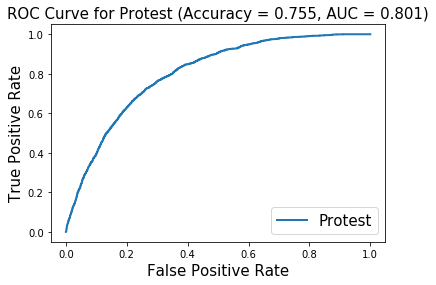

In [7]:
protest_truth = preds[preds["protest"] != -1]["protest"]
protest_preds = preds[preds["protest"] != -1]["pred_protest"]


au.plotROC("protest", protest_truth, protest_preds)

### Binary violence

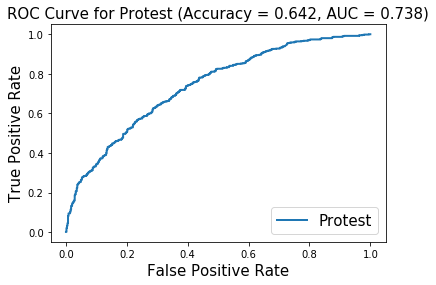

In [8]:
binary_violence_truth = preds[preds["binary_violence"] != -1]["binary_violence"]
protest_preds = preds[preds["binary_violence"] != -1]["pred_binary_violence"]


au.plotROC("protest", binary_violence_truth, protest_preds)

### Violence

Text(0.5,1,'violence (Correlation = 0.251, R_squared = 0.063 )')

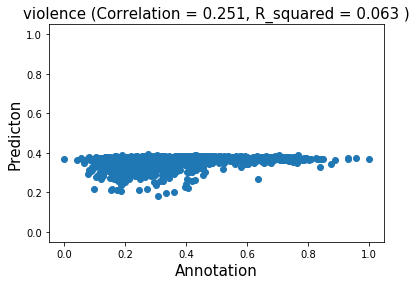

In [11]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
